In [1]:
# IMPORT ALL NEEDED LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# IMPORT DATASET
data = pd.read_csv('../dataset/SeoulBikeData.csv', encoding='Windows-1252')

# Our analysis will focus on "Rental Bike Count" as the target variable.

In [2]:
# EXPLORE DATA_1
data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0  01/12/2017                254     0             -5.2           37   
1  01/12/2017                204     1             -5.5           38   
2  01/12/2017                173     2             -6.0           39   
3  01/12/2017                107     3             -6.2           40   
4  01/12/2017                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  
0             Yes  
1             Yes  
2             Yes  
3             Yes  
4             Yes

In [3]:
# EXPLORE DATA_2
data.describe()

Rented Bike Count         Hour  Temperature(°C)  Humidity(%)  \
count        8760.000000  8760.000000      8760.000000  8760.000000   
mean          704.602055    11.500000        12.882922    58.226256   
std           644.997468     6.922582        11.944825    20.362413   
min             0.000000     0.000000       -17.800000     0.000000   
25%           191.000000     5.750000         3.500000    42.000000   
50%           504.500000    11.500000        13.700000    57.000000   
75%          1065.250000    17.250000        22.500000    74.000000   
max          3556.000000    23.000000        39.400000    98.000000   

       Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
count       8760.000000       8760.000000                8760.000000   
mean           1.724909       1436.825799                   4.073813   
std            1.036300        608.298712                  13.060369   
min            0.000000         27.000000                 -30.600000   
25%            0.900000        940.000000                  -4.700000   
50%            1.500000       1698.000000                   5.100000   
75%            2.300000       2000.000000                  14.800000   
max            7.400000       2000.000000                  27.200000   

       Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm)  
count              8760.000000   8760.000000    8760.000000  
mean                  0.569111      0.148687       0.075068  
std                   0.868746      1.128193       0.436746  
min                   0.000000      0.000000       0.000000  
25%                   0.000000      0.000000       0.000000  
50%                   0.010000      0.000000       0.000000  
75%                   0.930000      0.000000       0.000000  
max                   3.520000     35.000000       8.800000

In [38]:
# EXPLORE DATA_3
# NO NULL VALUES FOUND, THEREFORE NO ACTION TO BE TAKEN
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [39]:
# CHECKING FOR MISSING VALUES IN THE DATASET
print(data.isnull().sum())

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64


In [40]:
# CHECKING FOR DUPLICATED VALUES IN THE DATASET
print(data.duplicated().sum())

0


# FIRST CONCLUSION: NO NULL-VALUES, NO DUPLICATED AND NO MISSING VALUES ARE IN THIS DATASET

In [42]:
# CONVERT DATE COLUMN TO THE CORRECT FORMAT
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y')

# new columns day, month, year columns
data['Day'] = data['Date'].dt.day
data['Month'] = data['Date'].dt.month
data['Year'] = data['Date'].dt.year

data.head()

Date  Rented Bike Count  Hour  Temperature(°C)  Humidity(%)  \
0 2017-12-01                254     0             -5.2           37   
1 2017-12-01                204     1             -5.5           38   
2 2017-12-01                173     2             -6.0           39   
3 2017-12-01                107     3             -6.2           40   
4 2017-12-01                 78     4             -6.0           36   

   Wind speed (m/s)  Visibility (10m)  Dew point temperature(°C)  \
0               2.2              2000                      -17.6   
1               0.8              2000                      -17.6   
2               1.0              2000                      -17.7   
3               0.9              2000                      -17.6   
4               2.3              2000                      -18.6   

   Solar Radiation (MJ/m2)  Rainfall(mm)  Snowfall (cm) Seasons     Holiday  \
0                      0.0           0.0            0.0  Winter  No Holiday   
1                      0.0           0.0            0.0  Winter  No Holiday   
2                      0.0           0.0            0.0  Winter  No Holiday   
3                      0.0           0.0            0.0  Winter  No Holiday   
4                      0.0           0.0            0.0  Winter  No Holiday   

  Functioning Day  Day  Month  Year  
0             Yes    1     12  2017  
1             Yes    1     12  2017  
2             Yes    1     12  2017  
3             Yes    1     12  2017  
4             Yes    1     12  2017

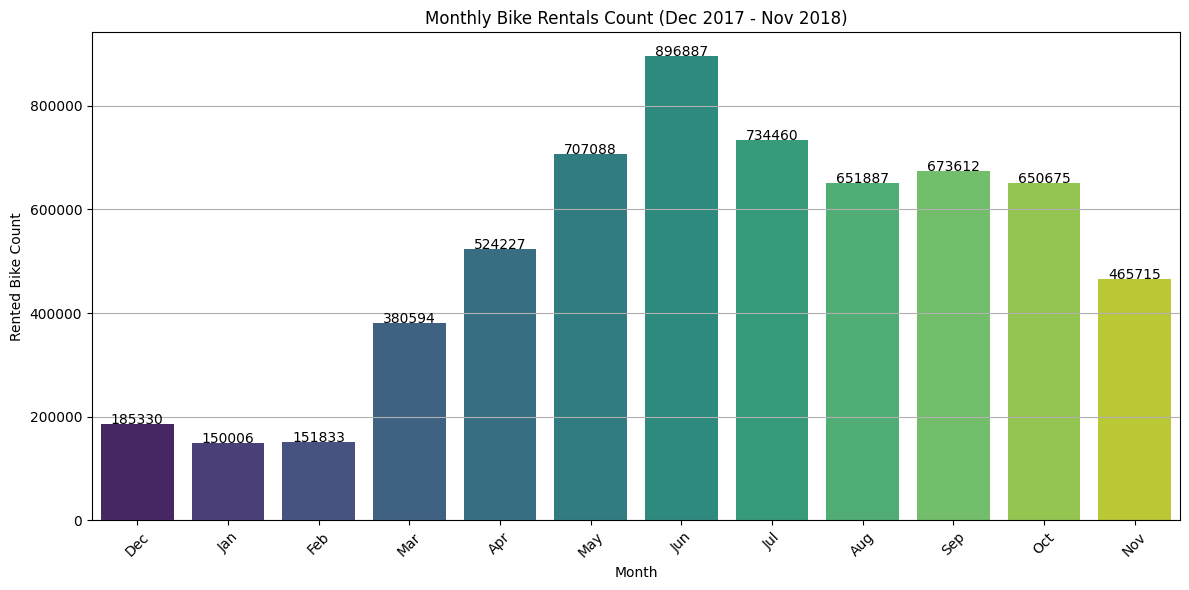

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the 'Date' column to datetime format, specifying the correct format and dayfirst=True
data['Date'] = pd.to_datetime(data['Date'], format='%d/%m/%Y', dayfirst=True)

# Extract month and year
data['month_year'] = data['Date'].dt.to_period('M')

# Aggregate the data by month_year
monthly_data = data.groupby('month_year')['Rented Bike Count'].sum().reset_index()

# Create a custom order for the months
month_order = pd.period_range(start='2017-12', end='2018-11', freq='M')

plt.figure(figsize=(12, 6))
sns.barplot(data=monthly_data, x='month_year', y='Rented Bike Count', errorbar=None, palette='viridis', order=month_order)

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Rented Bike Count')
plt.title('Monthly Bike Rentals Count (Dec 2017 - Nov 2018)')

# Set x-axis ticks to show month names
plt.xticks(ticks=range(len(month_order)), labels=['Dec', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov'], rotation=45)

# Annotate the bars with the total numbers
for i, v in enumerate(monthly_data['Rented Bike Count']):
    plt.text(i, v + 0.5, str(v), color='black', ha='center')

plt.tight_layout()
plt.grid(True, axis='y')
plt.show()

# Second conclusion: We don't have a full year's worth of data. The data starts on December 1st 2017 and end on November 2018.
# Third conclusion, the usual winter months in Seoul (Dec, Jan, Feb) show a relative low number of total rented bikes, with the most rentals in the month of June (896887 bikes rented).

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


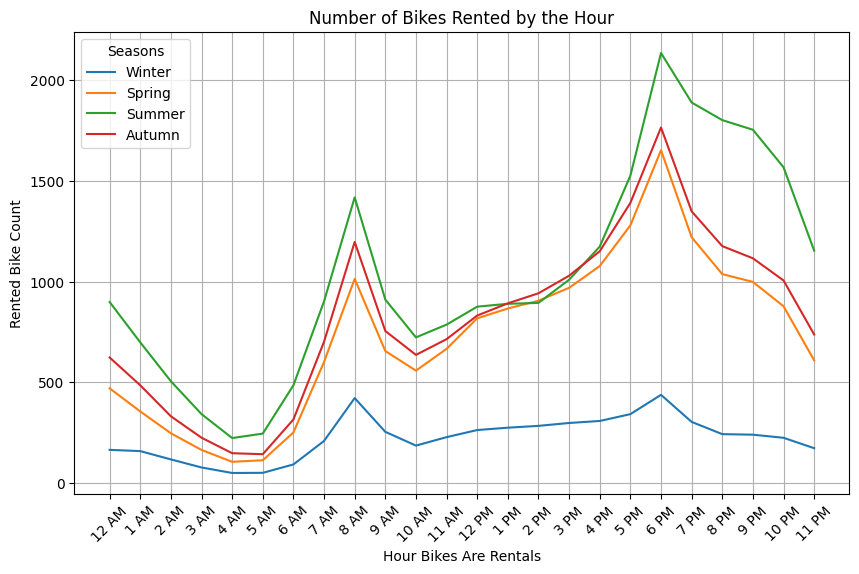

In [10]:
plt.figure(figsize=(10, 6))

palette = sns.color_palette("mako_r", 12)
sns.lineplot(data=data, x='Hour', y='Rented Bike Count', hue='Seasons', errorbar=None)

plt.title('Number of Bikes Rented by the Hour')
plt.xlabel('Hour Bikes Are Rentals')
plt.ylabel('Rented Bike Count')

# format x-axis to 12-hour time
plt.xticks(ticks=range(0, 24), labels=[f'{hour % 12 or 12} {"AM" if hour < 12 else "PM"}' for hour in range(24)], rotation=45)


plt.grid(True)
plt.show()

# All seasons show the same pattern in bike rentals per hour. We see a first peak at 8am and the second, highest peak of bike rentals at 6pm. 

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


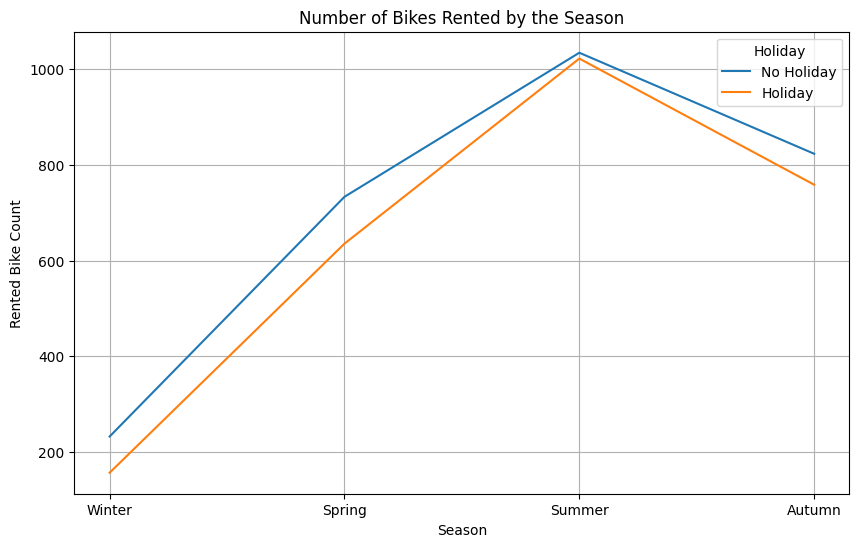

In [11]:

plt.figure(figsize=(10, 6))

palette = sns.color_palette("mako_r", 12)
sns.lineplot(data=data, x='Seasons', y='Rented Bike Count', hue='Holiday', errorbar=None)

plt.title('Number of Bikes Rented by the Season')
plt.xlabel('Season')
plt.ylabel('Rented Bike Count')

plt.grid(True)
plt.show()

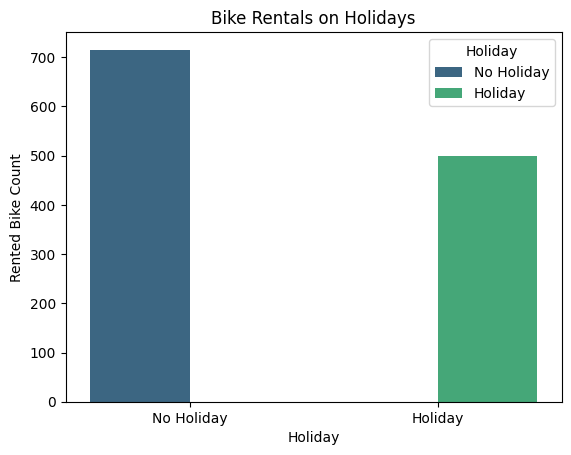

In [12]:
sns.barplot(data=data, x='Holiday', y="Rented Bike Count", hue="Holiday", errorbar=None, palette='viridis')

plt.xlabel('Holiday')
plt.ylabel('Rented Bike Count')
plt.title('Bike Rentals on Holidays')
plt.show()

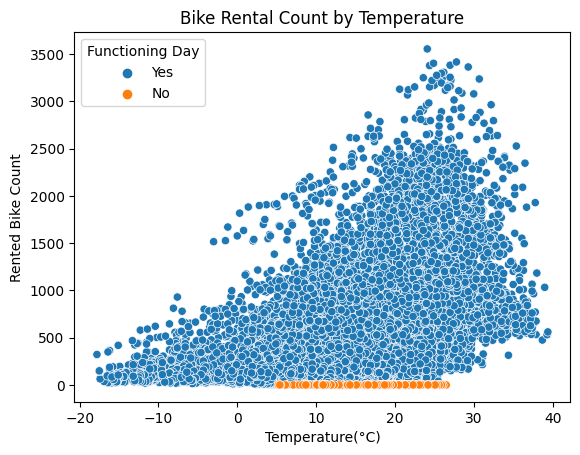

In [13]:
sns.scatterplot(data=data, x="Temperature(°C)", y="Rented Bike Count", hue="Functioning Day")
plt.title('Bike Rental Count by Temperature')
plt.show()

# We can see that the bike rentals increase together with the temperature. However, the bike rentals go down after we hit a temperature of 25 to 30 degrees.

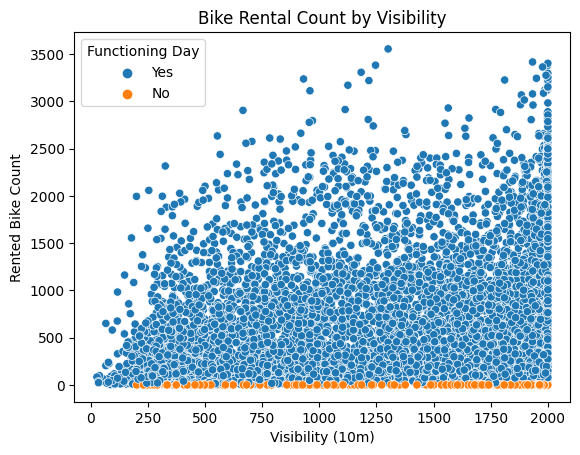

In [14]:
sns.scatterplot(data=data, x="Visibility (10m)", y="Rented Bike Count", hue="Functioning Day")
plt.title('Bike Rental Count by Visibility')
plt.show()

START ANALYSIS WITH IDENTIFYING OUTLIERS.


Outliers in Rented Bike Count: 158
2946    2401
2994    2402
3114    2401
3210    2404
3282    2692
        ... 
7746    2631
7818    2613
7842    2415
7866    2612
7890    2632
Name: Rented Bike Count, Length: 158, dtype: int64

Outliers in Hour: 0
Series([], Name: Hour, dtype: int64)

Outliers in Temperature(°C): 0
Series([], Name: Temperature(°C), dtype: float64)

Outliers in Humidity(%): 0
Series([], Name: Humidity(%), dtype: int64)

Outliers in Wind speed (m/s): 161
82      4.5
84      4.8
85      5.4
86      4.5
87      5.8
       ... 
7934    4.4
7937    5.7
7985    4.9
8242    4.7
8245    5.3
Name: Wind speed (m/s), Length: 161, dtype: float64

Outliers in Visibility (10m): 0
Series([], Name: Visibility (10m), dtype: int64)

Outliers in Dew point temperature(°C): 0
Series([], Name: Dew point temperature(°C), dtype: float64)

Outliers in Solar Radiation (MJ/m2): 641
1741    2.35
1885    2.46
1886    2.39
1982    2.49
2054    2.36
        ... 
7741    2.43
7764    2.37
7765    2

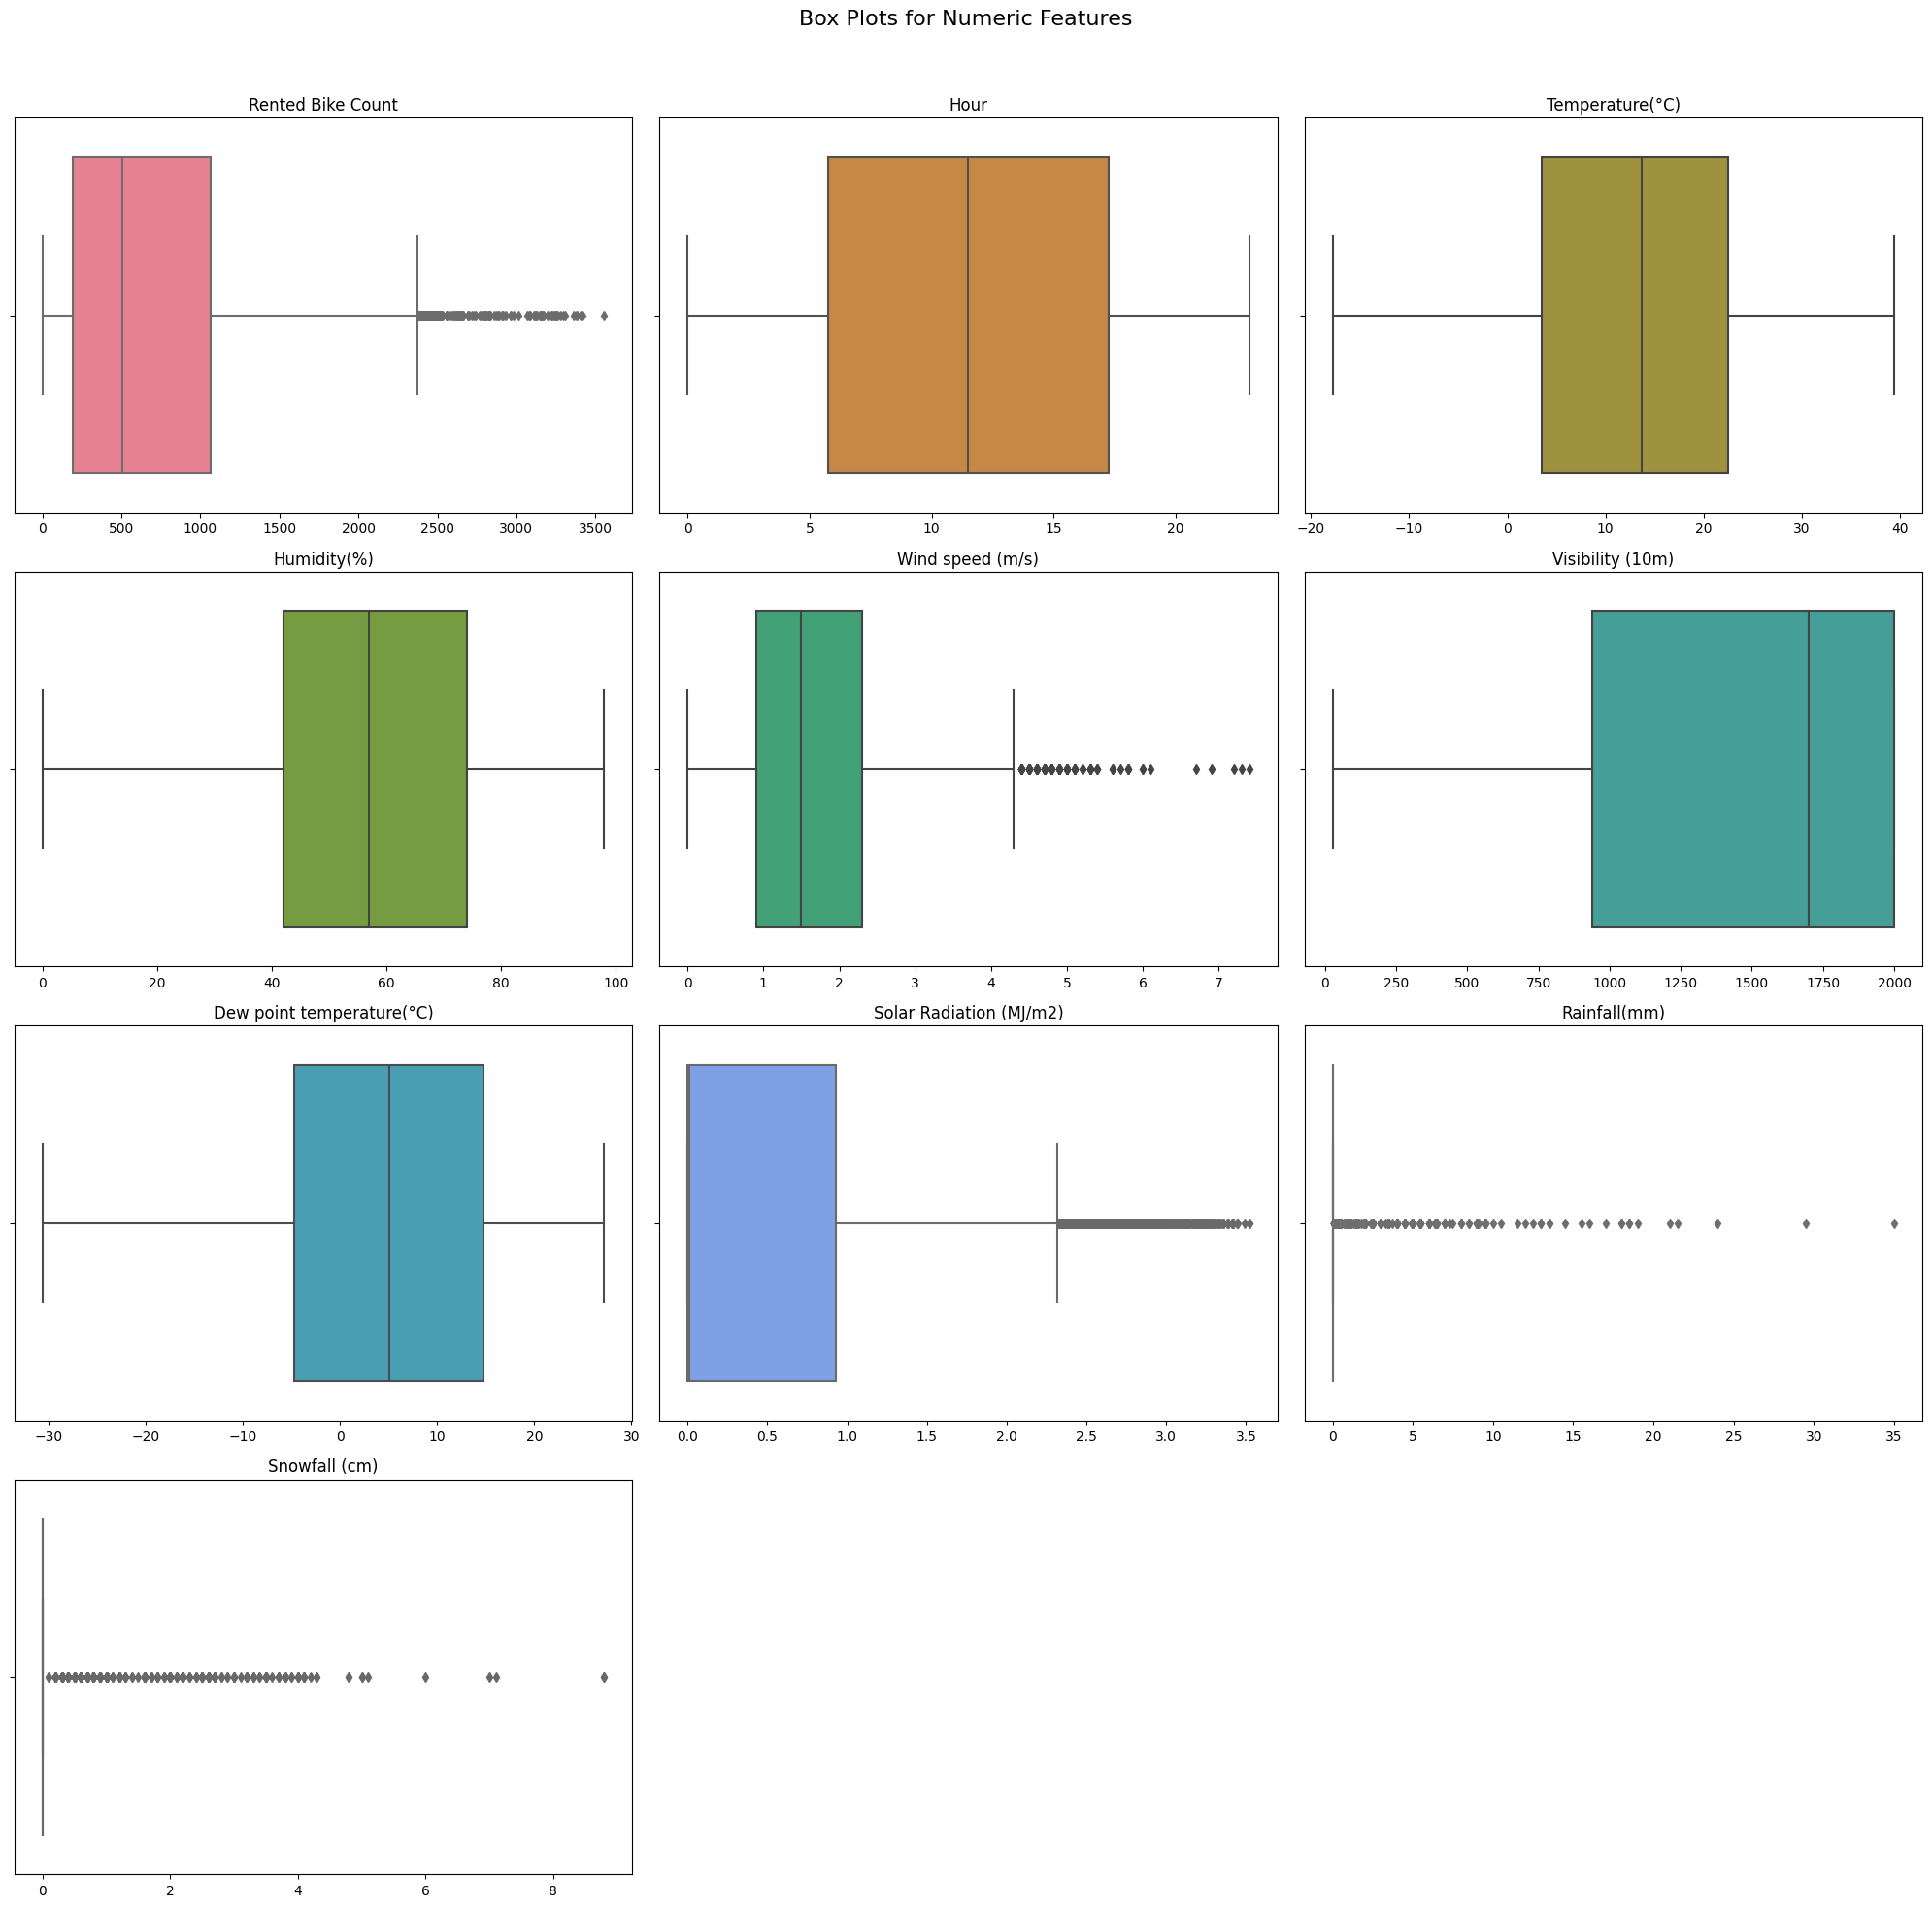

In [15]:
# CATCH ONLY NUMERIC COLUMNS FOR IDENTIFYING OUTLIERS
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# BOX PLOT STRUCTURE
n_cols = 3
n_rows = (len(numeric_columns) - 1) // n_cols + 1
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 5*n_rows))
fig.suptitle('Box Plots for Numeric Features', fontsize=16)

# FLATTEN THE AXES
axes = axes.flatten()

# GENERATE COLOR LIST FOR BETTER IDENTIFICATION
colors = sns.color_palette("husl", len(numeric_columns))

# CREATE BOX PLOTS
for i, column in enumerate(numeric_columns):
    sns.boxplot(x=data[column], ax=axes[i], color=colors[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('')
    
    # CALCULATE / PRINT OUTLIERS
    # WE ARE USING THE 1.5 APPROACH HERE.
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    # PRINT OUTLIER COUNT and the outliers themselves
    outlier_count = len(outliers)
    print(f"\nOutliers in {column}: {outlier_count}")
    print(outliers[column])

# HIDE UNUSED PLOTS
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


ANALYZING THE CORRELATION MATRIX

Correlation Matrix:
                           Rented Bike Count      Hour  Temperature(°C)  \
Rented Bike Count                   1.000000  0.410257         0.538558   
Hour                                0.410257  1.000000         0.124114   
Temperature(°C)                     0.538558  0.124114         1.000000   
Humidity(%)                        -0.199780 -0.241644         0.159371   
Wind speed (m/s)                    0.121108  0.285197        -0.036252   
Visibility (10m)                    0.199280  0.098753         0.034794   
Dew point temperature(°C)           0.379788  0.003054         0.912798   
Solar Radiation (MJ/m2)             0.261837  0.145131         0.353505   
Rainfall(mm)                       -0.123074  0.008715         0.050282   
Snowfall (cm)                      -0.141804 -0.021516        -0.218405   

                           Humidity(%)  Wind speed (m/s)  Visibility (10m)  \
Rented Bike Count            -0.199780          0.121108          0.199280  

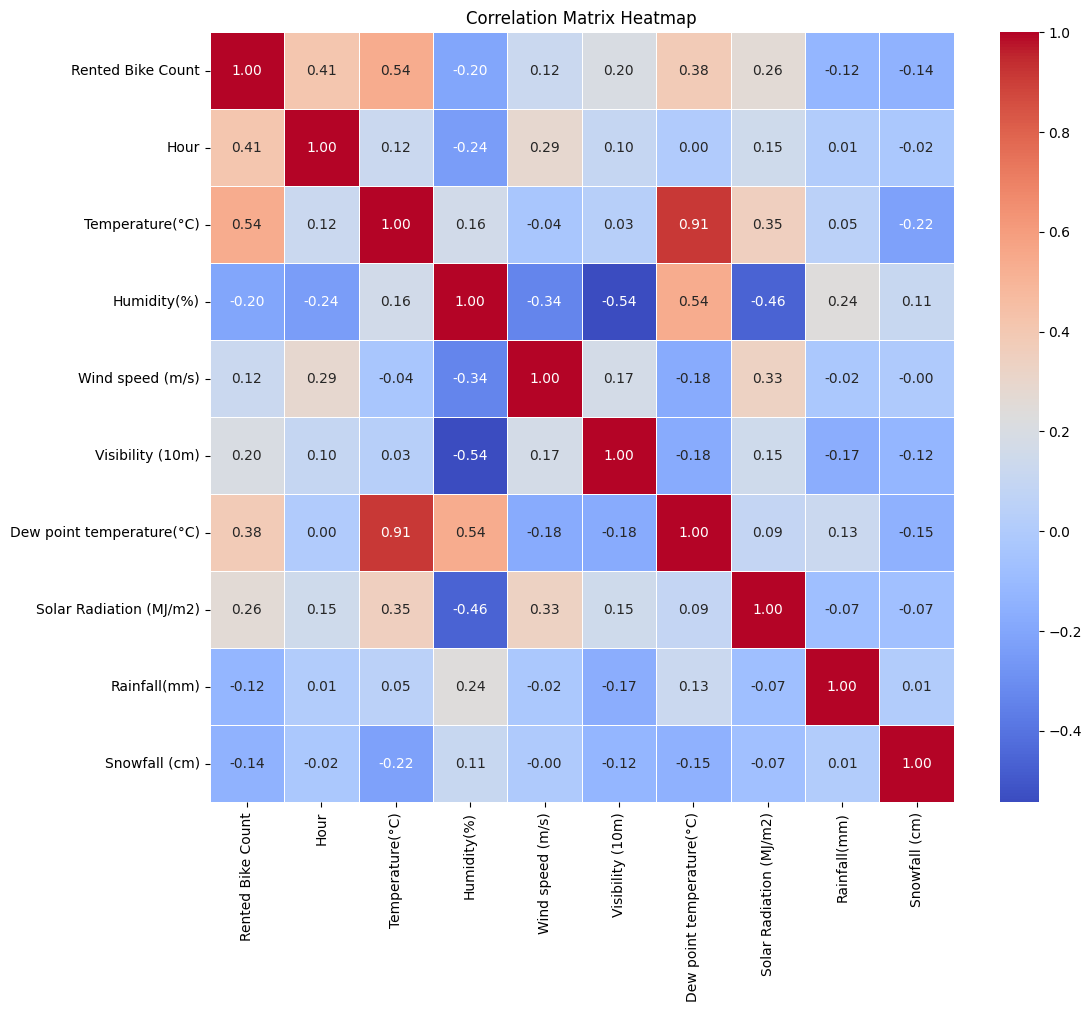

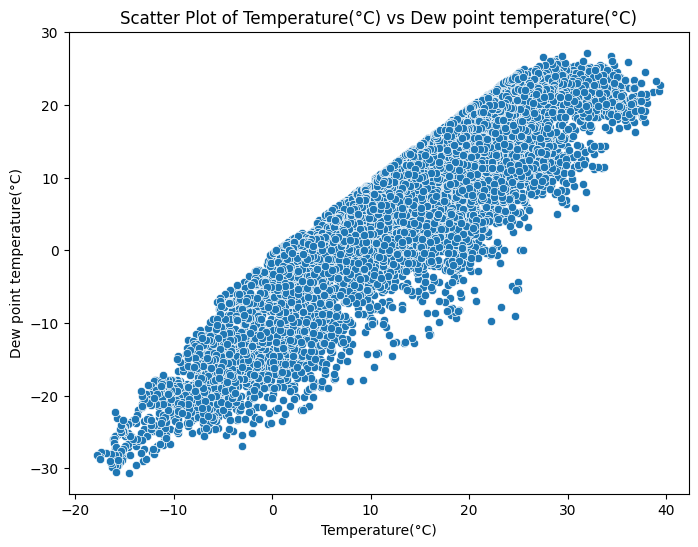

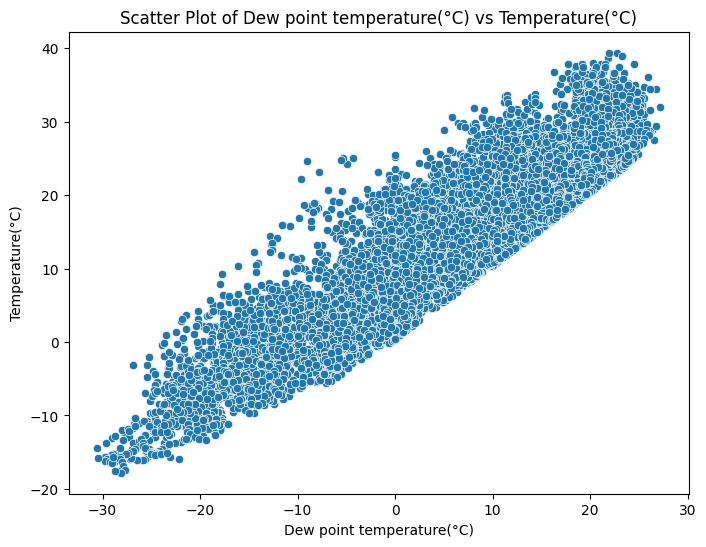

In [16]:
# 1. Select only numeric columns
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns

# 2. Compute the correlation matrix
corr_matrix = data[numeric_columns].corr()

# 3. Display the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

# 4. Plot the heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 5. Plot scatter plots for pairs of features with high correlation
# Define a threshold for high correlation
threshold = 0.7

# Find pairs of features with high correlation
high_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns 
                    if i != j and abs(corr_matrix.loc[i, j]) > threshold]

# Plot scatter plots for high correlation pairs
for (feature1, feature2) in high_corr_pairs:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=data[feature1], y=data[feature2])
    plt.title(f'Scatter Plot of {feature1} vs {feature2}')
    plt.xlabel(feature1)
    plt.ylabel(feature2)
    plt.show()

# Temperature and Dew Point Temperature are high related, almost identical. Therefore, we will explore if we can delete Dew Point Temperature from the dataset in the following phase(s).

DISTRIBUTION ANALYSIS

In [17]:
import warnings
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")


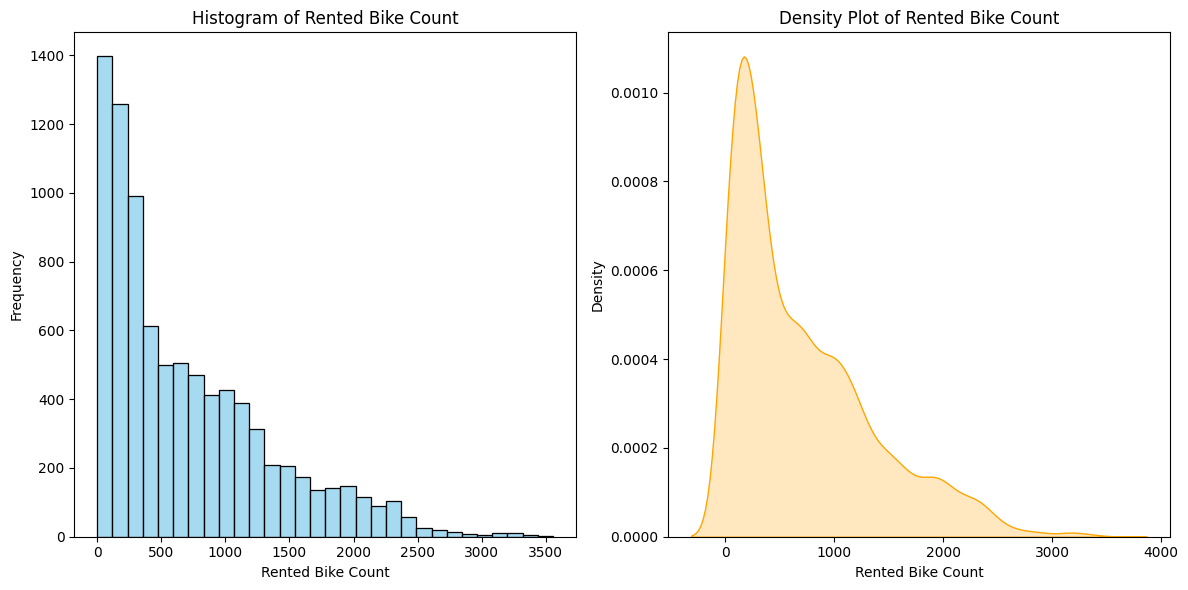

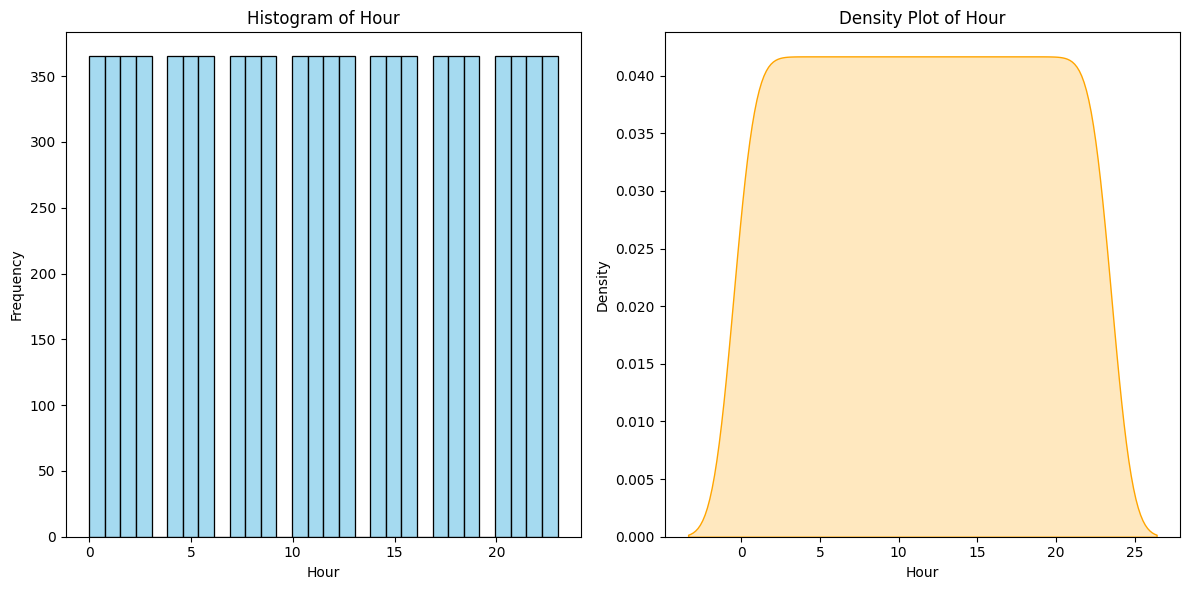

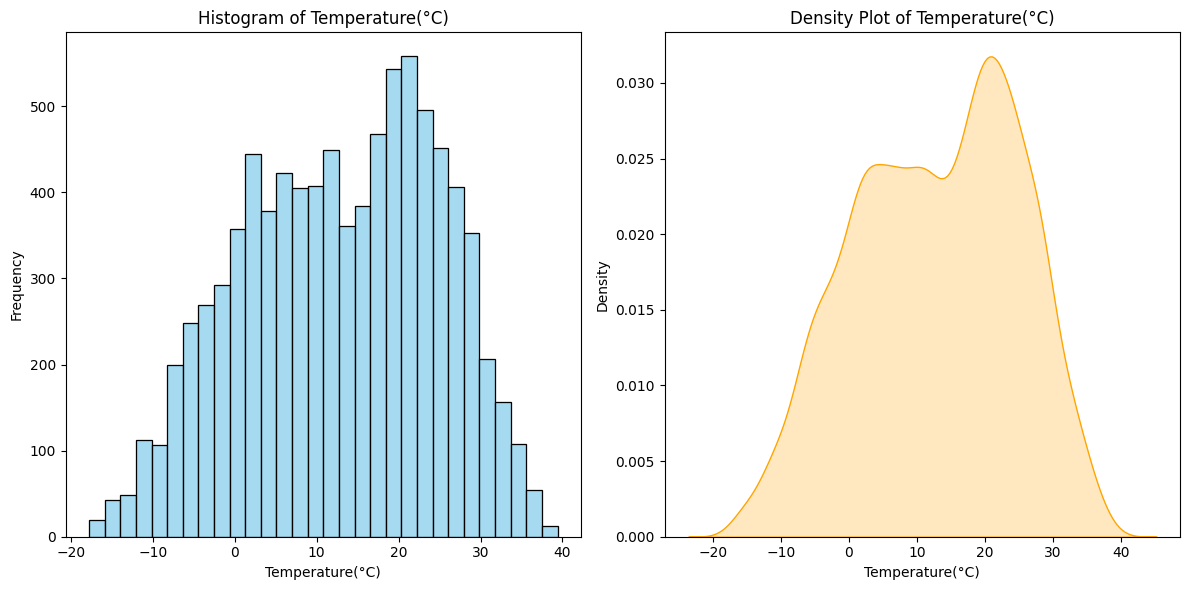

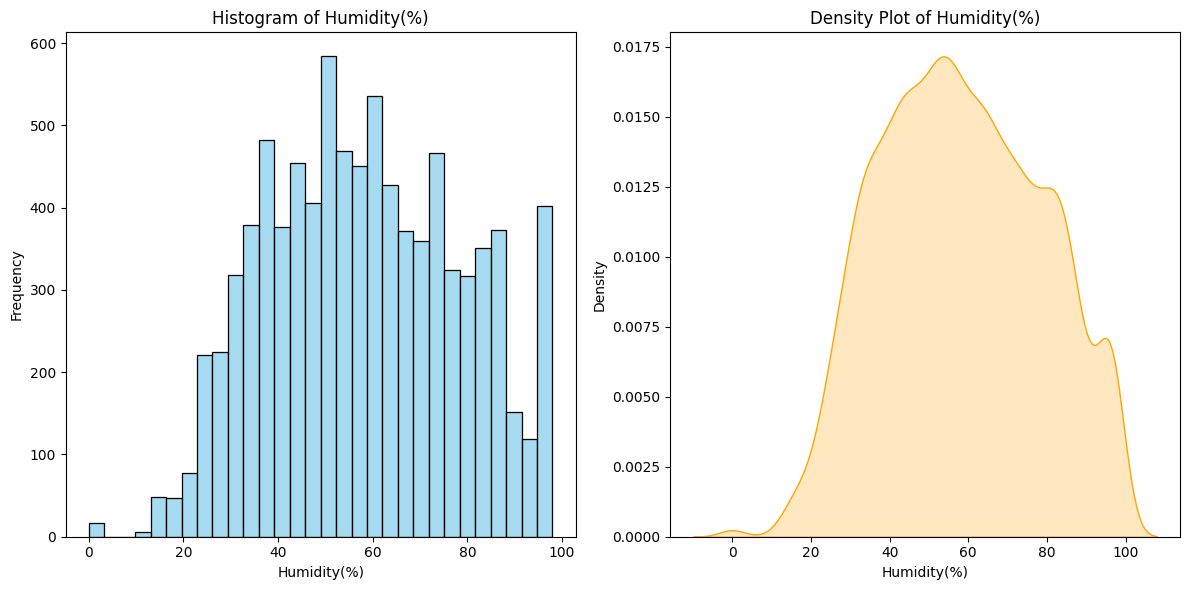

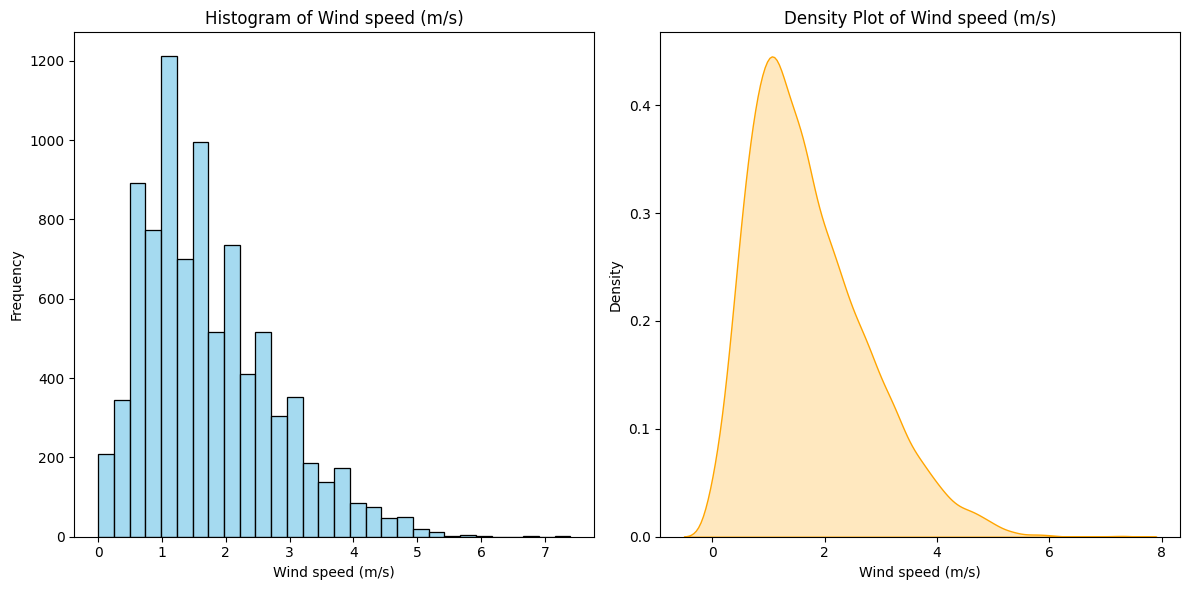

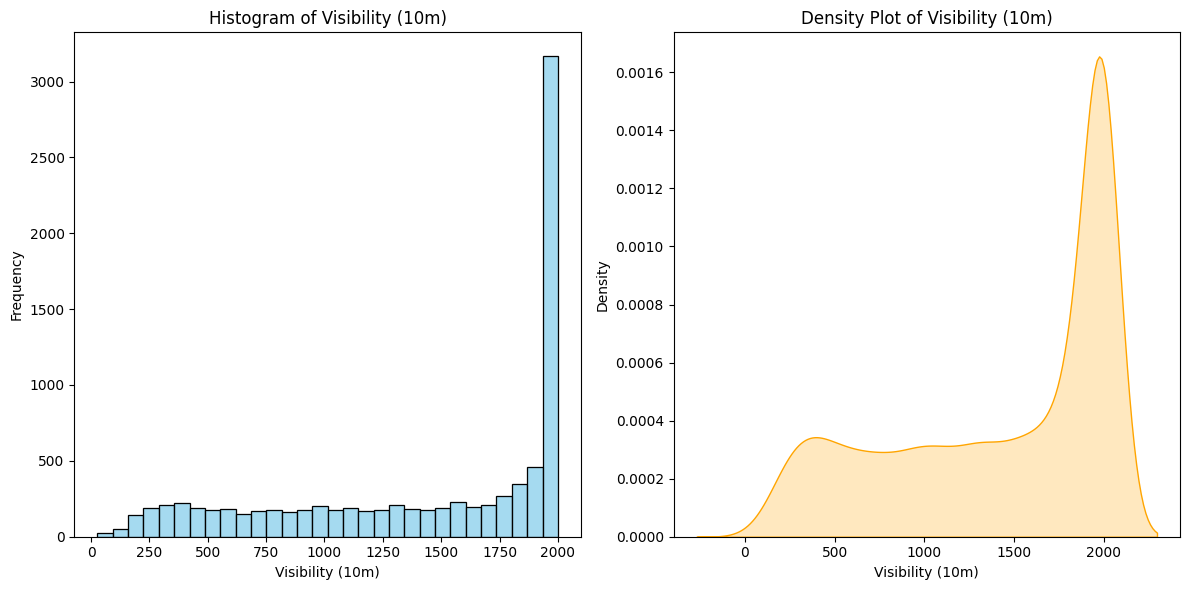

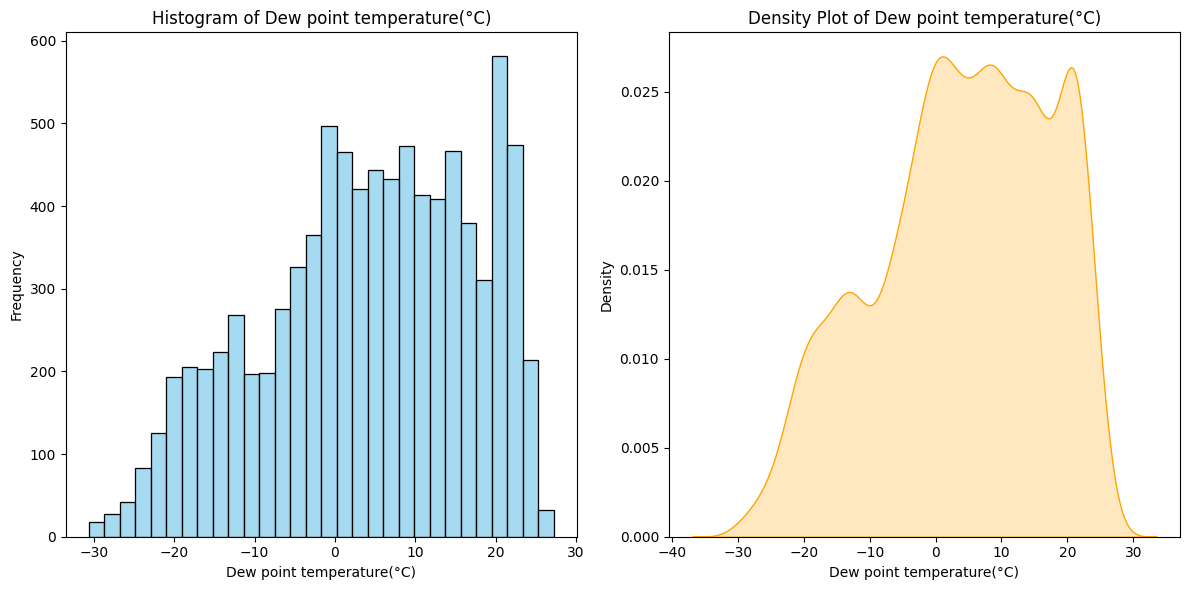

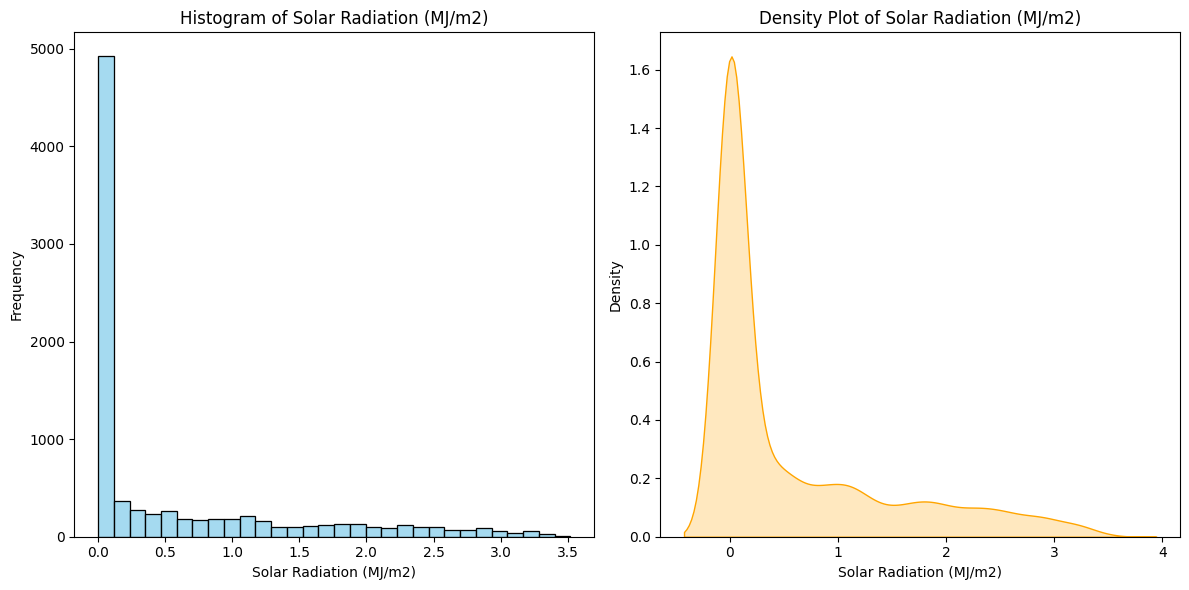

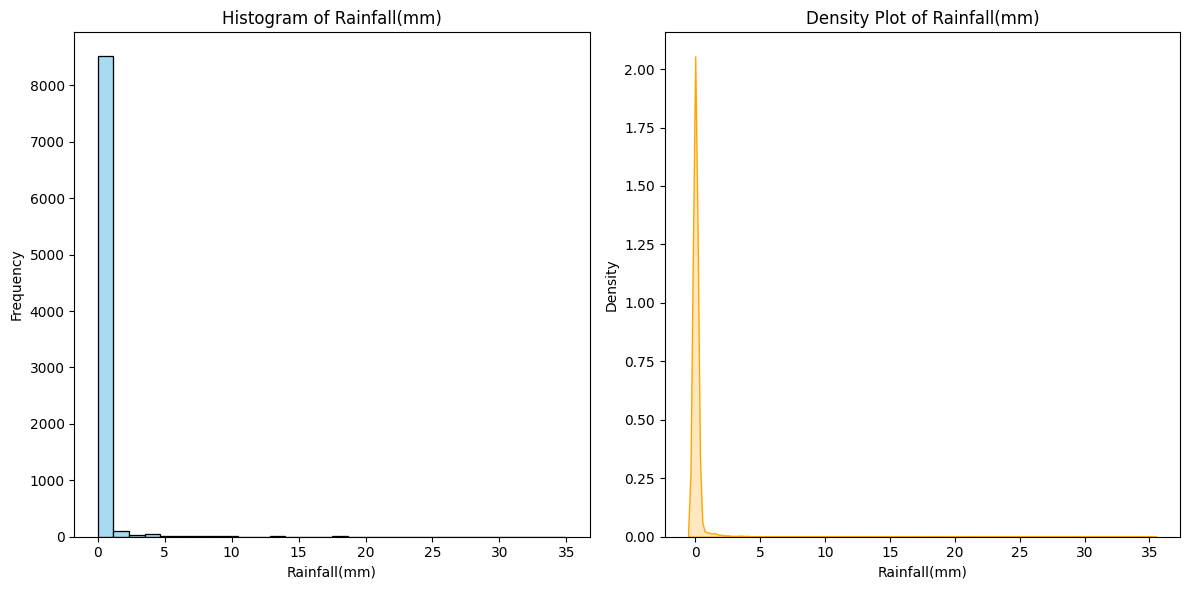

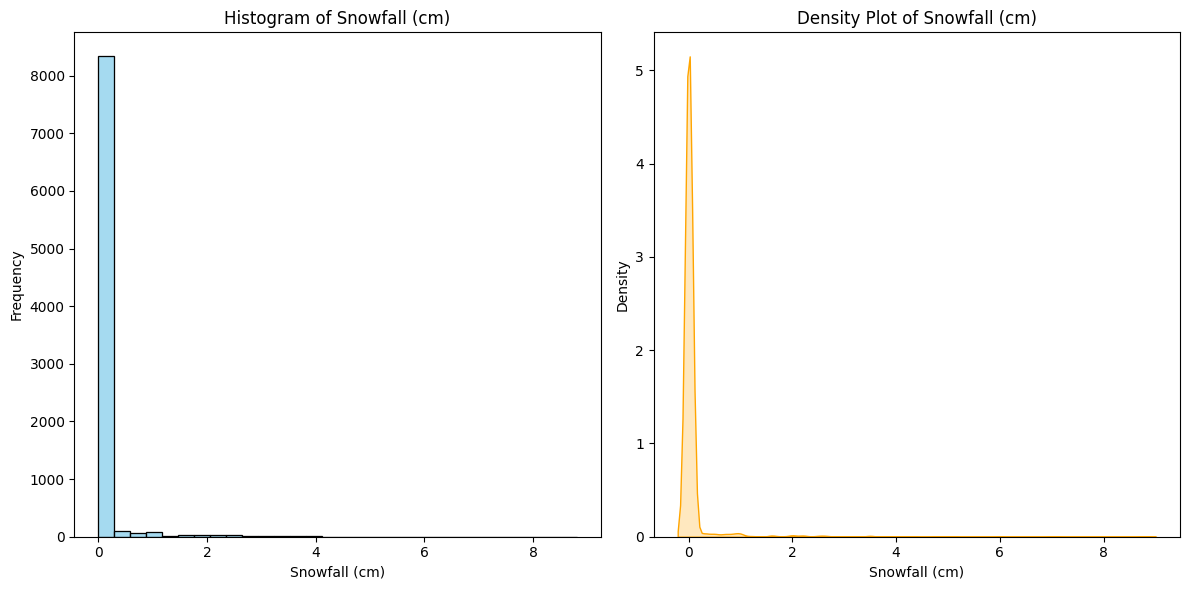

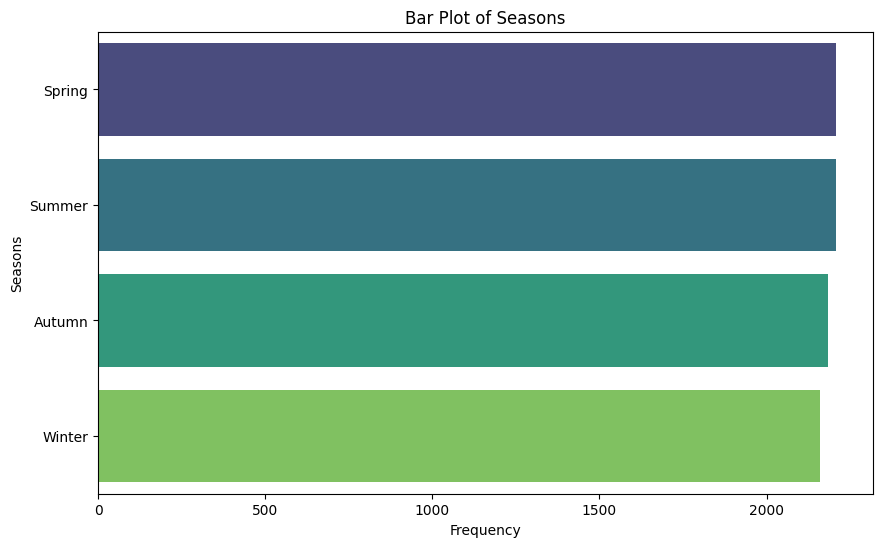

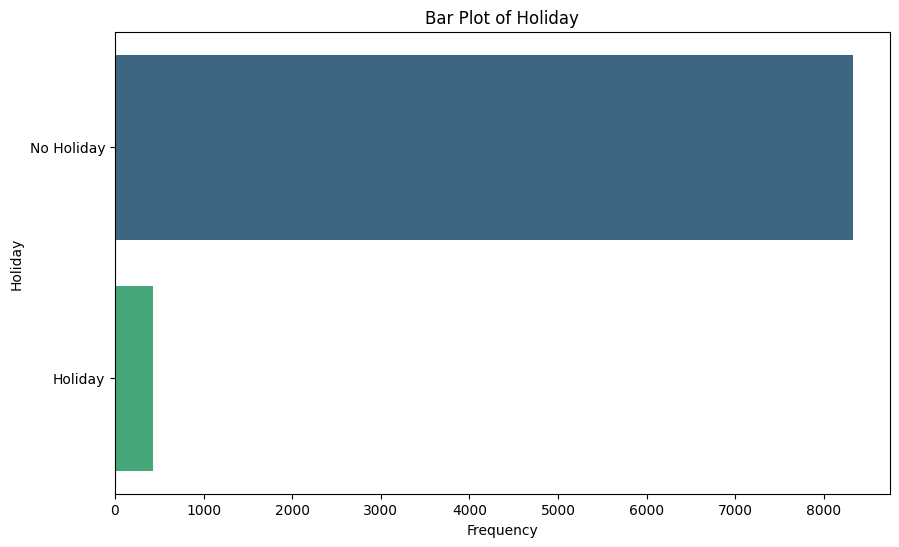

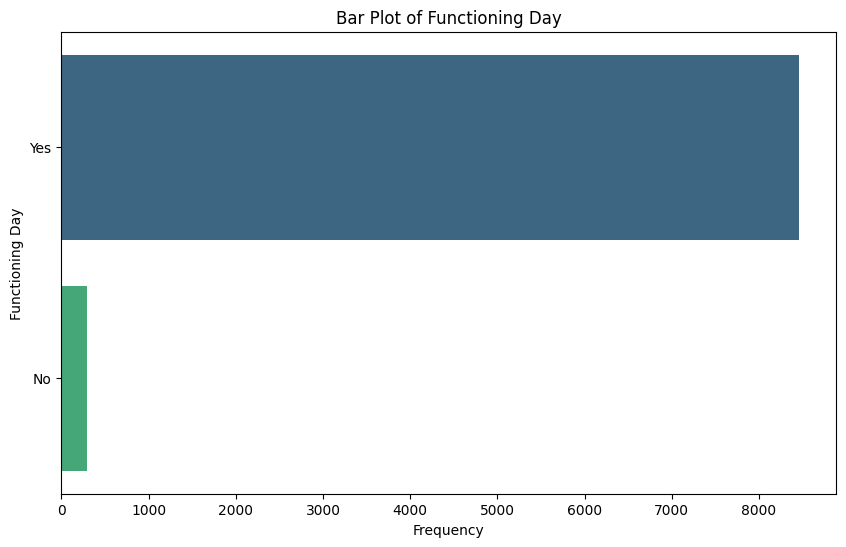

In [18]:
# Replace infinity values with NaN
data.replace([np.inf, -np.inf], np.nan, inplace=True)

# 1. Distribution Analysis for Numerical Features
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

for column in numerical_columns:
    plt.figure(figsize=(12, 6))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data[column], kde=False, bins=30, color='skyblue')
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Density Plot
    plt.subplot(1, 2, 2)
    sns.kdeplot(data[column], fill=True, color='orange')  # Updated here
    plt.title(f'Density Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')
    
    plt.tight_layout()
    plt.show()

# 2. Distribution Analysis for Categorical Features
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    
    # Bar Plot
    sns.countplot(y=data[column], order=data[column].value_counts().index, palette='viridis')
    plt.title(f'Bar Plot of {column}')
    plt.xlabel('Frequency')
    plt.ylabel(column)
    
    plt.show()



PAIRPLOTTING

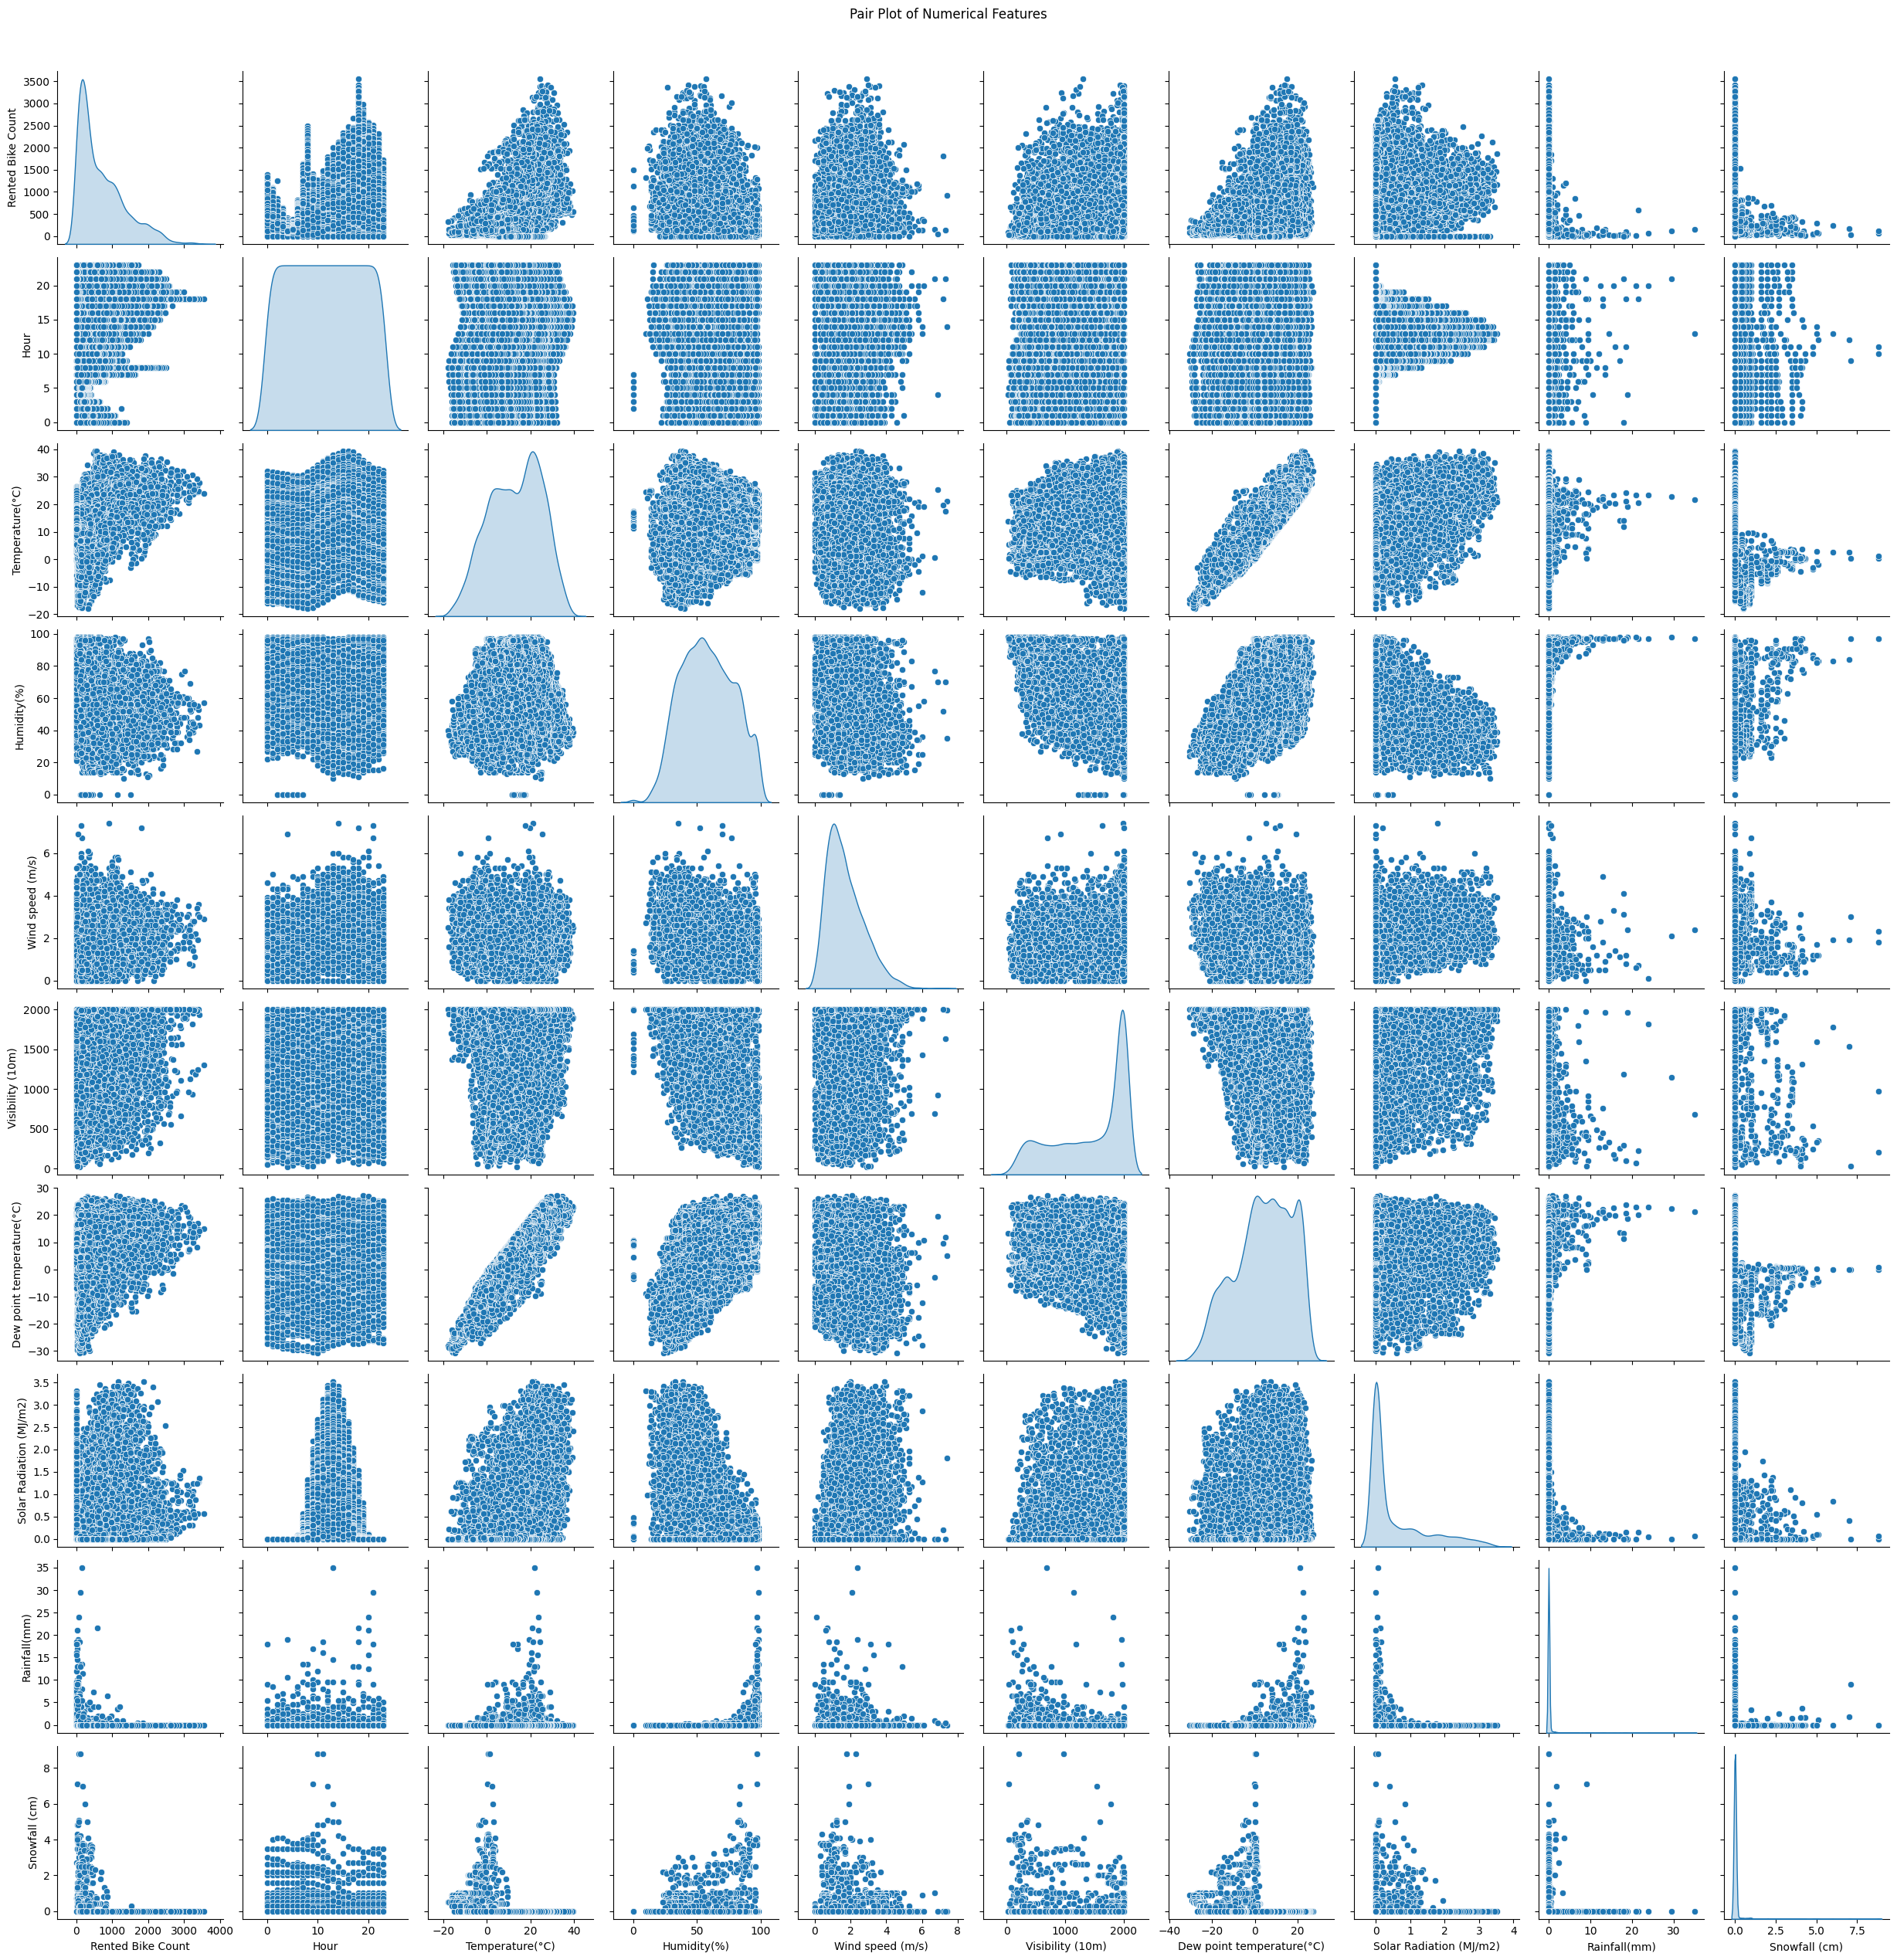

In [19]:
# 1. Select only numerical columns
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# 2. Create a pair plot to visualize relationships between numerical features
pair_plot = sns.pairplot(data[numerical_columns], diag_kind='kde', hue=None)

# Set the title
pair_plot.fig.suptitle('Pair Plot of Numerical Features', y=1.02)

# Show the plot
plt.show()


/var/folders/fw/n247jk9d15q29z3g4t6wglym0000gn/T/ipykernel_92126/1911594587.py:18: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data['Rented Bike Count'], shade=True, color='orange')


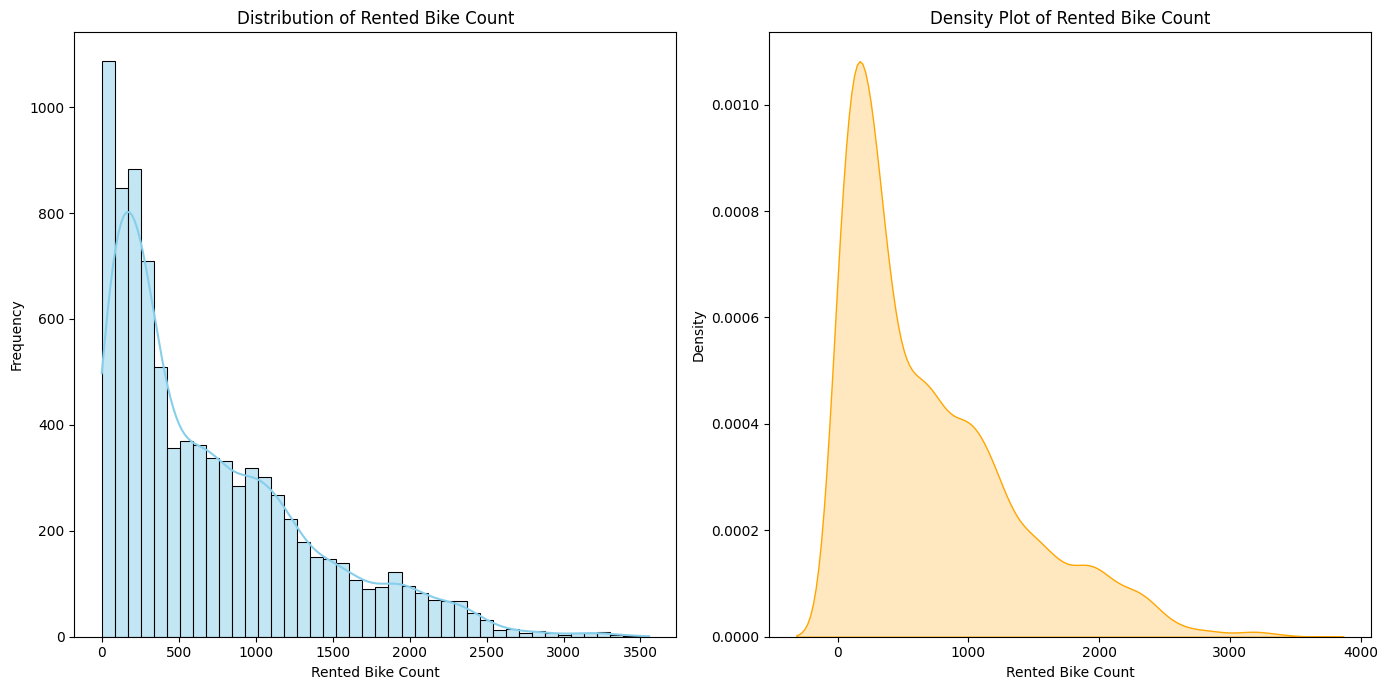

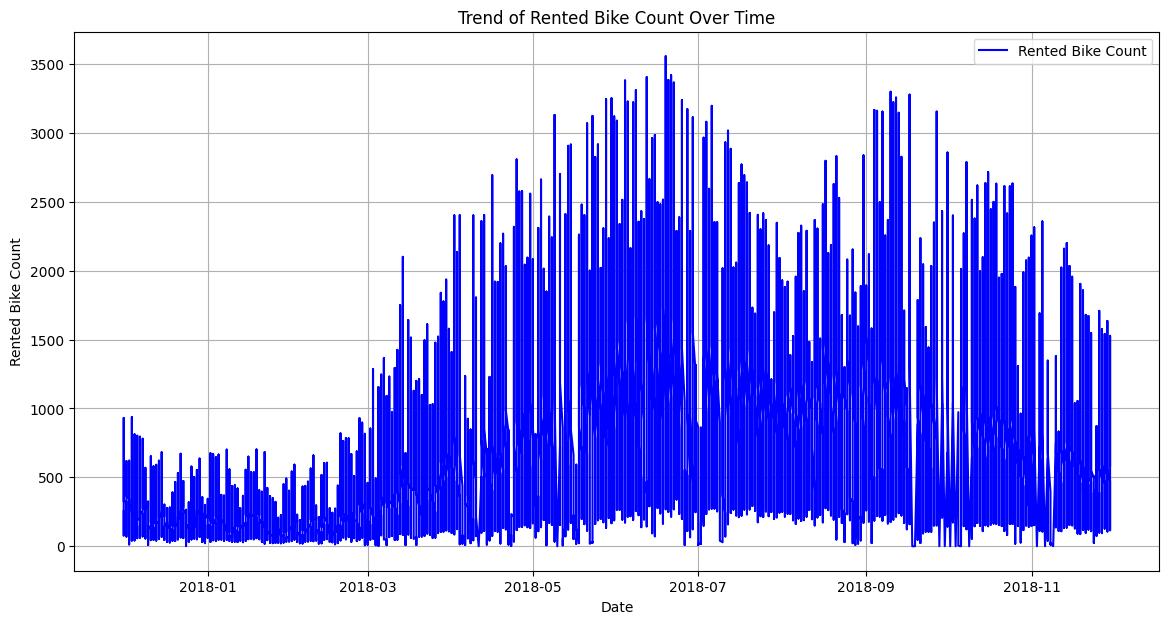

Correlation of Features with Rented Bike Count:
Rented Bike Count            1.000000
Temperature(°C)              0.538558
Hour                         0.410257
Dew point temperature(°C)    0.379788
Solar Radiation (MJ/m2)      0.261837
Visibility (10m)             0.199280
Wind speed (m/s)             0.121108
Rainfall(mm)                -0.123074
Snowfall (cm)               -0.141804
Humidity(%)                 -0.199780
Name: Rented Bike Count, dtype: float64


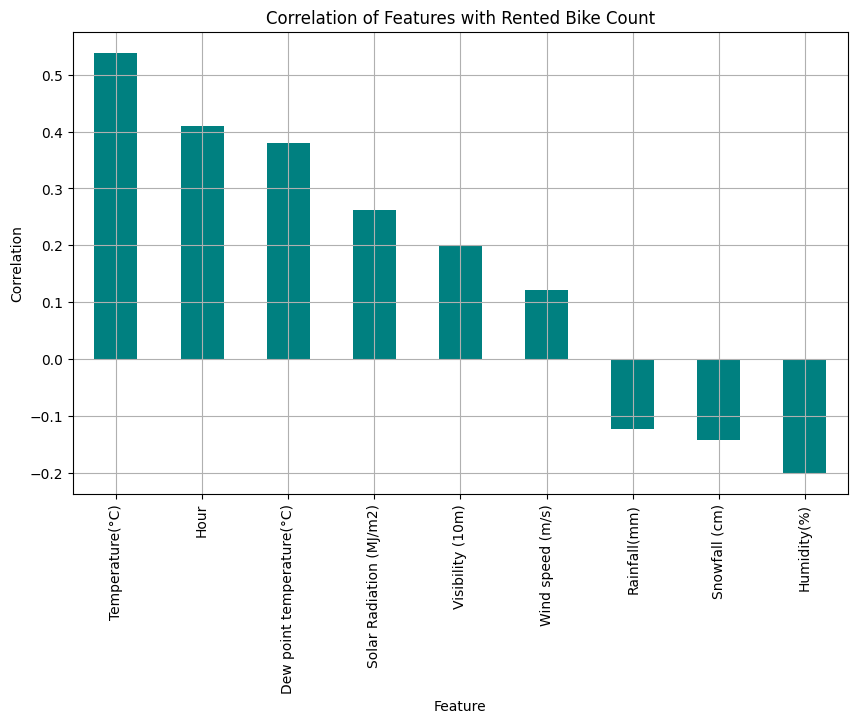

Statistical Summary of Rented Bike Count:
count    8760.000000
mean      704.602055
std       644.997468
min         0.000000
25%       191.000000
50%       504.500000
75%      1065.250000
max      3556.000000
Name: Rented Bike Count, dtype: float64


In [20]:
data['Date'] = pd.to_datetime(data['Date'])

# Set the datetime column as the index
data.set_index('Date', inplace=True)

# 1. Distribution Analysis
plt.figure(figsize=(14, 7))

# Histogram
plt.subplot(1, 2, 1)
sns.histplot(data['Rented Bike Count'], kde=True, color='skyblue')
plt.title('Distribution of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Frequency')

# Density Plot
plt.subplot(1, 2, 2)
sns.kdeplot(data['Rented Bike Count'], shade=True, color='orange')
plt.title('Density Plot of Rented Bike Count')
plt.xlabel('Rented Bike Count')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

# 2. Trend Analysis
plt.figure(figsize=(14, 7))
plt.plot(data.index, data['Rented Bike Count'], label='Rented Bike Count', color='blue')
plt.title('Trend of Rented Bike Count Over Time')
plt.xlabel('Date')
plt.ylabel('Rented Bike Count')
plt.legend()
plt.grid(True)
plt.show()

# 3. Correlation with Features
# Select numerical columns for correlation analysis
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation with target variable
correlation_with_target = data[numerical_columns].corr()['Rented Bike Count'].sort_values(ascending=False)

# Print correlations
print("Correlation of Features with Rented Bike Count:")
print(correlation_with_target)

# Plot correlations with target variable
plt.figure(figsize=(10, 6))
correlation_with_target.drop('Rented Bike Count').plot(kind='bar', color='teal')
plt.title('Correlation of Features with Rented Bike Count')
plt.xlabel('Feature')
plt.ylabel('Correlation')
plt.grid(True)
plt.show()

# 4. Statistical Summary
print("Statistical Summary of Rented Bike Count:")
print(data['Rented Bike Count'].describe())
